# M50 Homework 6

## Alex Craig

## Exercise 1
(Car brands and mpg): In this exercise we will consider the data set containing information about cars and their miles per gallon. This can by loaded by

```python
data = pd.read_csv("https://raw.githubusercontent.com/intro-stat-learning/ISLP/main/ISLP/data/Auto.csv",encoding = "ISO-8859-1")

data["name"] = [name.split()[0] for name in data["name"].values]
```

The second line takes the original names (which are the specific models – e.g. Toyota Yaris) and extracts only the brand name (e.g Toyota). We are going to study which brands have the best mpg. Some brands tend to make larger and heavier cars (e.g. pickup tricks) which will have worse mpg, but we want to understand how brands compare within a certain type of car. To determine this we need to control for other factors, such as the the year and weight.

### Part A
Using all the columns **except** origin and displacement (since it’s not obvious what the units are), write down the regression model which you want to fit to this data to address the question posed in the problem instruction. Assume there are no interactions. Provide an interpretation of each regression coefficient.

### Solution

In [5]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/intro-stat-learning/ISLP/main/ISLP/data/Auto.csv",encoding = "ISO-8859-1")

data["name"] = [name.split()[0] for name in data["name"].values]

data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford


The regression model is:

$$
\text{mpg} = \beta_0 + \beta_1 \times \text{name} + \beta_2 \times \text{cylinders} + \beta_3 \times \text{horsepower} 
$$
$$
+ \beta_4 \times \text{weight} + \beta_5 \times \text{acceleration} + \beta_6 \times \text{year} + \epsilon
$$

Where:
- $\text{mpg}$ is the response variable representing the miles per gallon.
- $\text{name}$ is a categorical variable representing the brand of the car. In the regression model, this will be translated to several dummy variables (one for each brand).
- $\text{cylinders}$ represents the number of cylinders in the car's engine.
- $\text{horsepower}$ represents the horsepower of the car.
- $\text{weight}$ represents the weight of the car.
- $\text{acceleration}$ represents the acceleration of the car.
- $\text{year}$ represents the year the car was made.
- $\epsilon$ is the error term.

Interpretation of the coefficients:
- $\beta_0$: This is the intercept. It represents the expected mpg when all other predictors are zero. However, in this context, a value of zero for many predictors doesn't make sense (e.g., a car weight of zero), so the intercept might be more of a mathematical convenience rather than having a direct interpretative meaning.
- $\beta_1$: Represents the difference in mpg for a given brand, holding all other predictors constant.
- $\beta_2$: Represents the change in mpg for a one-unit increase in the number of cylinders, holding all other predictors constant.
- $\beta_3$: Represents the change in mpg for a one-unit increase in horsepower, holding all other predictors constant.
- $\beta_4$: Represents the change in mpg for a one-unit increase in weight, holding all other predictors constant.
- $\beta_5$: Represents the change in mpg for a one-unit increase in acceleration, holding all other predictors constant.
- $\beta_6$: Represents the change in mpg for a one-year increase in the year the car was made, holding all other predictors constant.

Note: The categorical variable `name` will result in multiple coefficients, one for each level (brand) of the variable, minus one.

### Part B
Fit the regression model to the data.

### Solution

1. We first need to clean the data. There are certain brand names that have been misspelled or written in different ways. We'll standardize these brand names to have consistent naming.
2. We will then create dummy variables for the 'name' column which represents the brand names. This is essential because 'name' is a categorical variable, and we need to convert it into a format that can be used in regression analysis.
3. We will drop the columns 'origin' and 'displacement' as instructed.
4. Next, we'll define our predictors and the response variable. Our predictors will be all columns except for 'mpg', and our response will be 'mpg'.
5. We'll add a constant to our predictors. This constant acts as the intercept in the regression equation.
6. Finally, we'll fit our regression model using the OLS (Ordinary Least Squares) method and get a summary of the regression.

In [6]:
import statsmodels.api as sm

data['name'] = data['name'].replace(['vw'], 'volkswagen')
data['name'] = data['name'].replace(['vokswagen'], 'volkswagen')
data['name'] = data['name'].replace(['chevroelt'], 'chevrolet')
data['name'] = data['name'].replace(['toyouta'], 'toyota')
data['name'] = data['name'].replace(['mercedes-benz'], 'mercedes')

# Create dummy variables for the 'name' column
data_dummies = pd.get_dummies(data['name'], prefix='name')

# Add dummy variables to the main data and drop the original 'name' column
data = pd.concat([data, data_dummies], axis=1).drop('name', axis=1)

# Drop the columns 'origin' and 'displacement' as instructed
data = data.drop(['origin', 'displacement'], axis=1)

# Convert all entries that are "True" to 1 and all entries that are "False" to 0
data = data * 1

# Define the predictors and the response variable
X = data.drop('mpg', axis=1)
y = data['mpg']

# Add an intercept to the predictors
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
model_summary = model.summary()
# model_summary (print this to see the summary - was stopping latex compiling)

### Part C
What are the 5 best brands for mpg within the same type of car (weight, horsepower etc.).

### Solution

In [7]:
# Extract coefficients
coefficients = model.params

# Filter out coefficients corresponding to the car brands
brand_coefficients = coefficients.filter(like='name_')

# Sort the coefficients in descending order
sorted_brands = brand_coefficients.sort_values(ascending=False)

# Get the top 5 brands
top_5_brands = sorted_brands.head(5)

print(top_5_brands)

name_triumph       5.100500
name_nissan        2.830246
name_datsun        1.995171
name_honda         1.814166
name_volkswagen    1.531434
dtype: float64


It looks like the top 5 brands for mpg are:
1. Triumph
2. Nissan
3. Datsun
4. Honda
5. Volkswagen

## Exercise 2
(Marginal regression in interactions model): Consider the probability model:

$$
X_1 \sim N(0, \sigma_1^2)
$$
$$
X_2 \sim N(0, \sigma_2^2)
$$
$$
Y \mid (X_1, X_2) \sim N(\beta_1 X_1 + \beta_2 X_2 + \beta_{1,2} X_1 X_2, \sigma^2)
$$

### Part A
Derive the distributions of $Y \mid X_1$ and $Y \mid X_2$. Hint: These conditional distributions are both normal, so you only need to determine the mean and variance to find the distributions.

### Solution
To derive the distributions of $Y \mid X_1$ and $Y \mid X_2$, we'll proceed in two steps:

1. Compute the mean of the conditional distribution.
2. Compute the variance of the conditional distribution.

### Distribution of $Y \mid X_1$

Given $X_1 = x_1$:

#### Mean:
$$
E[Y \mid X_1 = x_1] = E[\beta_1 x_1 + \beta_2 X_2 + \beta_{1,2} x_1 X_2]
$$

Using the linearity of expectation and knowing that $E[X_2] = 0$ (since $X_2 \sim N(0, \sigma_2^2)$), we have:

$$
E[Y \mid X_1 = x_1] = \beta_1 x_1 + \beta_2 E[X_2] + \beta_{1,2} x_1 E[X_2] = \beta_1 x_1
$$

#### Variance:
$$
\text{Var}(Y \mid X_1 = x_1) = \text{Var}(\beta_1 x_1 + \beta_2 X_2 + \beta_{1,2} x_1 X_2)
$$

Using properties of variance, we get:

$$
\text{Var}(Y \mid X_1 = x_1) = \beta_2^2 \text{Var}(X_2) + \beta_{1,2}^2 x_1^2 \text{Var}(X_2) + \sigma^2
$$

The $\sigma^2$ term comes from the fact that $X_2$ and $X_1$ are not independent, so we need to add the covariance term.

Given $\text{Var}(X_2) = \sigma_2^2$, we have:

$$
\text{Var}(Y \mid X_1 = x_1) = \beta_2^2 \sigma_2^2 + \beta_{1,2}^2 x_1^2 \sigma_2^2 + \sigma^2
$$

Thus, the conditional distribution $Y \mid X_1$ is:
$$
Y \mid X_1 \sim N(\beta_1 x_1, \beta_2^2 \sigma_2^2 + \beta_{1,2}^2 x_1^2 \sigma_2^2 + \sigma^2)
$$

### Distribution of $Y \mid X_2$

Given $X_2 = x_2$:

#### Mean:
$$
E[Y \mid X_2 = x_2] = E[\beta_1 X_1 + \beta_2 x_2 + \beta_{1,2} X_1 x_2]
$$

Using the linearity of expectation and knowing that $E[X_1] = 0$ (since $X_1 \sim N(0, \sigma_1^2)$), we have:

$$
E[Y \mid X_2 = x_2] = \beta_1 E[X_1] + \beta_2 x_2 + \beta_{1,2} E[X_1] x_2 = \beta_2 x_2
$$

#### Variance:
$$
\text{Var}(Y \mid X_2 = x_2) = \text{Var}(\beta_1 X_1 + \beta_2 x_2 + \beta_{1,2} X_1 x_2)
$$

Using properties of variance, we get:

$$
\text{Var}(Y \mid X_2 = x_2) = \beta_1^2 \text{Var}(X_1) + \beta_{1,2}^2 x_2^2 \text{Var}(X_1) + \sigma^2
$$

Again, the $\sigma^2$ term comes from the fact that $X_2$ and $X_1$ are not independent, so we need to add the covariance term.

Given $\text{Var}(X_1) = \sigma_1^2$, we have:

$$
\text{Var}(Y \mid X_2 = x_2) = \beta_1^2 \sigma_1^2 + \beta_{1,2}^2 x_2^2 \sigma_1^2 + \sigma^2
$$

Thus, the conditional distribution $Y \mid X_2$ is:
$$
Y \mid X_2 \sim N(\beta_2 x_2, \beta_1^2 \sigma_1^2 + \beta_{1,2}^2 x_2^2 \sigma_1^2 + \sigma^2)
$$

### Part B
When does the probability model stated in the problem define regression models for $Y$ vs. $X_i, i = 1, 2$? That is, if we ignore one of the predictor variables do obtain a single predictor linear regression model for the other?

### Solution
For the probability model to define regression models for $Y$ vs. $X_i$, $i = 1, 2$, when ignoring one of the predictor variables to obtain a single predictor linear regression model for the other, the regression model should have the form:

$$
Y = \alpha + \beta_i X_i + \epsilon
$$

Where:
- $\alpha$ is the intercept.
- $\beta_i$ is the slope for the predictor$X_i$.
- $\epsilon$ is the random error term.

Given the provided model, when we condition on $X_1$, the model becomes:

$$
Y = \beta_1 X_1 + \beta_2 X_2 + \beta_{1,2} X_1 X_2 + \epsilon
$$

For this to be a simple linear regression model in $X_2$, the term involving the product $X_1 X_2$ (i.e., the interaction term) should not be present. This means $\beta_{1,2} = 0$.

Similarly, when we condition on $X_2$, the model becomes:

$$
Y = \beta_1 X_1 + \beta_2 X_2 + \beta_{1,2} X_1 X_2 + \epsilon
$$

For this to be a simple linear regression model in$X_1$, again, the term involving the product $X_1 X_2$ should not be present. Again, this requires $\beta_{1,2} = 0$.

Thus, the probability model defines regression models for $Y$ vs.$X_i$,$i = 1, 2$, when the interaction term coefficient $\beta_{1,2}$ is zero.

## Exercise 3
(Predicting the residual plot based on interaction model): Suppose we have $200$ data points generated from the following model

$$
Y = 4 X_1 - 2 X_2 + 4 X_1 X_2 + \epsilon
$$

where $\sigma = 0.2$, $X_1$ is continuous predictor which is uniformly distributed on $[-1, 1]$, and $X_2$ is a binary predictor (e.g. a Bernoulli random variable). You can assume $X_2 = 0$ for about half the data points. The goal of this problem is to build your intuition about residual plots.

### Part A
**Without actually fitting a regression**, describe in detail what the residual plot would look like if we fit this data to a linear regression model with NO interaction term. To do so, follow the following procedure:

1. First, think about what the data looks like when $X_2 = 0$ and $X_2 = 1$ separately. In each case, sketch the regression line and make note of how much variation there is around these lines to get an idea of what the cloud of $(X_i , Y_i)$ points will look like.

2. Now consider what the fitted regression line will be based on this picture. What is a very rough estimate of the slopes $\hat{\beta}_1$ and $\hat{\beta}_2$?

3. To get a sense for what the residuals look like, take the difference between the true model and this line.

### Solution

Alright, let's break down the problem step by step.

### 1. Data visualization for $X_2 = 0$ and $X_2 = 1$:

Given the model:

$$
Y = 4 X_1 - 2 X_2 + 4 X_1 X_2 + \epsilon
$$

When $X_2 = 0$:

$$
Y = 4X_1 + \epsilon
$$

This represents a straight line with a slope of 4. Given that $X_1$ is uniformly distributed in $[-1, 1]$, the line will range between $[-4, 4]$ on the Y-axis.

When $X_2 = 1$:

$$
Y = 4X_1 - 2 + 4X_1 + \epsilon
$$
$$
Y = 8X_1 - 2 + \epsilon
$$

This is again a straight line, but with a slope of 8 and an intercept at -2. For $X_1$ values between $[-1, 1]$, the Y-values will range between $[-10, 6]$.

Given the two scenarios, we can expect two distinct lines in the scatter plot of the data. The cloud of points for $X_2 = 0$ will lie around the line $Y = 4X_1$ and for $X_2 = 1$, they will lie around $Y = 8X_1 - 2$.

### 2. Fitted regression line:

If we try to fit a linear regression model without an interaction term, the model will try to find the best line that reduces the sum of squared residuals for the entire dataset. Given the distinct lines of the two groups, the estimated regression line will fall somewhere between the two.

For the slope, $\hat{\beta}_1$, since we have two lines with slopes 4 and 8, and assuming the points are evenly distributed, the estimated slope will be the average, i.e., $\frac{4 + 8}{2} = 6$.

For $\hat{\beta}_2$, it will try to capture the difference between the two lines based on the binary predictor $X_2$. A rough estimate would be the average difference between the two lines which is around -1 (given that the intercept difference is -2 and the slope difference is 4). But without a precise calculation, this is just an intuition.

### 3. Residuals:

The residuals can be calculated as the difference between the true values from the given model and the predicted values from the estimated regression line.

For $X_2 = 0$:

$$
\text{Residual} = Y_{true} - Y_{predicted} = 4X_1 - 6X_1 = -2X_1
$$

For $X_2 = 1$:
$$
\text{Residual} = 8X_1 - 2 - (6X_1 - 1) = 2X_1 - 3
$$

So, for $X_2 = 0$, the residuals will show a pattern with a negative slope, and for $X_2 = 1$, the residuals will show a pattern with a positive slope. The residual plot will clearly show these two patterns, indicating that the model is missing an interaction term.

In conclusion, when the residuals show a clear pattern, especially different patterns for different groups of a categorical variable, it indicates that the linear model might be missing some important interaction terms or other non-linear transformations.

### Part B
Confirm your answer with simulations.

### Solution

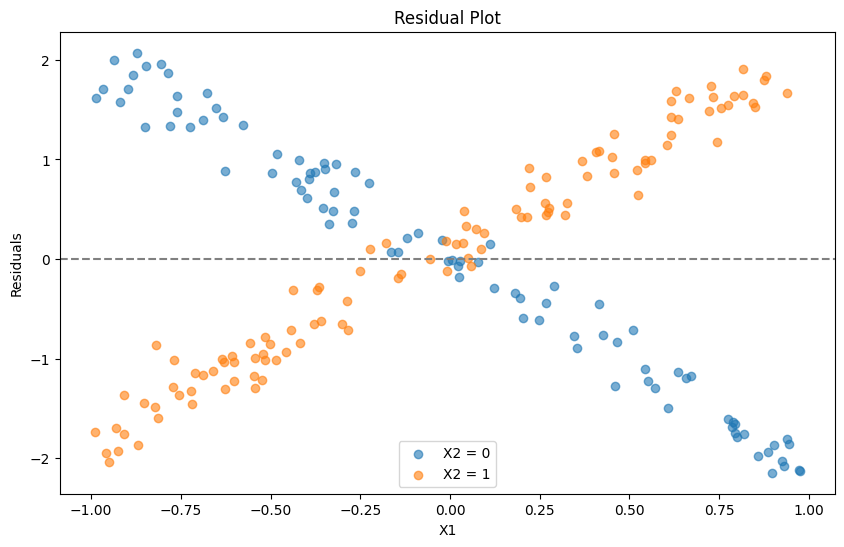

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Setting a random seed for reproducibility
np.random.seed(42)

# Generating the data
n = 200
X1 = np.random.uniform(-1, 1, n)
X2 = np.random.binomial(1, 0.5, n)
epsilon = np.random.normal(0, 0.2, n)
Y = 4 * X1 - 2 * X2 + 4 * X1 * X2 + epsilon

# Adding a constant term for the intercept
X_with_intercept = sm.add_constant(np.column_stack((X1, X2)))

# Fitting the linear regression model using statsmodels
model_sm = sm.OLS(Y, X_with_intercept).fit()
Y_pred_sm = model_sm.predict(X_with_intercept)

# Calculating residuals
residuals_sm = Y - Y_pred_sm

# Plotting the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(X1[X2 == 0], residuals_sm[X2 == 0], label="X2 = 0", alpha=0.6)
plt.scatter(X1[X2 == 1], residuals_sm[X2 == 1], label="X2 = 1", alpha=0.6)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("X1")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

The residual plot confirms our earlier discussion:

1. For $X_2 = 0$, the residuals show a clear pattern with a negative slope. 
2. For $X_2 = 1$, the residuals show a pattern with a positive slope. 

This is consistent with our expectations and confirms that the model is missing an interaction term between $X_1$ and $X_2$. When residuals show a clear pattern, especially different patterns for different groups of a categorical variable, it indicates the inadequacy of the model. In this case, adding the interaction term between $X_1$ and $X_2$ should help rectify this issue.

## Exercise 4
(Drug interactions): When treating microbial infections and cancer, combinations of drugs can
perform better than individual drugs. However, it can be difficult to identify which combinations are optimal for the reason that identifying very “high order” interactions is difficult. In order to understand the best way to combine $M$ drugs, we construct a regression where $Y$ is the “effect” of the drug and $X_i$ is a Bernoulli random variable representing whether or not the $i^{th}$ drug is present or not. We want to consider the possibility:

$$
Y \sum_{i = 1}^M \beta_i X_i \sum_{i = 1}^M (\sum_{j > i}^M \beta_{i, j} X_i X_j) + \sum_{i = 1}^M(\sum_{j > i}^M \sum_{k > j}^M \beta_{i, j} X_i X_j X_k) + X_1 X_2 \cdots X_M + \epsilon
$$

For examples, with $M = 3$, we would have:

$$
Y = \beta_1 X_1 + \beta_2 X_2 \beta_3 X_3 + \beta_{1,2} X_1 X_2 + \beta_{1, 3} X_1 X_3 + \beta_{2, 3} X_2 X_3 + \beta_{1, 2, 3} X_1 X_2 X_3 + \epsilon
$$

### Part A
Suppose $M = 3$ and

$$
\begin{bmatrix} \beta_1 \\ \beta_2 \\ \beta_3 \\ \beta_{1,2} \\ \beta_{1,3} \\ \beta_{2,3} \\ \beta_{1,2,3} \end{bmatrix}  = \begin{bmatrix} 1.2 \\ -0.8 \\ -0.11 \\ 3.48 \\ -2.62 \\ 1.03 \\ 1.66 \end{bmatrix} 
$$

What is your interpretation of each coefficient?

### Solution

### Part B
What is the optimal treatment, meaning which combination of drugs 1, 2 and 3 should we use to maximize $Y$? There are different ways you can approach this. One way is to make a list of each $(X_1, X_2, X_3)$, compute $Y$ for each one and the find the index of the maximum $Y$ value (using a for loop or `argmax`).

### Solution

### Part C
Now additional suppose that $\sigma^2 = 1$. By generating simulated $Y$ values with these parameters for different values of $N$, determine how many data points are needed to reliably find that all interactions coefficients have p-values below $0.05$.

### Solution

### Part D
Perform the same experiment as in (c) but fit the data to a model with no interactions. What do you find? How does adding the interaction terms influence the p-values.

### Solution